In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zorgt dat grafieken direct zichtbaar zijn
%matplotlib inline

In [2]:

CURRENT_ECOSYSTEM = 'npm'

# --- AANNAMES (TIJD) ---
lines_per_hour_insert = 3     # Nieuwe code schrijven (traag)
lines_per_hour_delete = 5     # Code weghalen (sneller)
STARTUP_TIME = 4

print(f"--- BEREKENING MET GESPLITSTE SNELHEDEN ({CURRENT_ECOSYSTEM}) ---")
print(f"Schrijven: {lines_per_hour_insert} loc/h | Verwijderen: {lines_per_hour_delete} loc/h | Opstart: {STARTUP_TIME} uur")


--- BEREKENING MET GESPLITSTE SNELHEDEN (npm) ---
Schrijven: 3 loc/h | Verwijderen: 5 loc/h | Opstart: 4 uur


In [3]:
DATA = {
    'npm': {
        # SQ1 (Dagen) en SQ2 (Insertions/Deletions) resultaten:
        'Low':      {'days': 395.0, 'insertions': 83.1, 'deletions': 32.3},
        'Medium':   {'days': 640.0, 'insertions': 196.8, 'deletions': 49.4},
        'High':     {'days': 914.0, 'insertions': 45.4, 'deletions': 16.1},
        'Critical': {'days': 21.0,  'insertions': 22.1, 'deletions': 11.1}
    }
}

In [4]:
stats = DATA[CURRENT_ECOSYSTEM]
results = []

for severity, params in stats.items():
    # 1. Bereken Engineering Effort (Uren)
    time_writing = params['insertions'] / lines_per_hour_insert
    time_deleting = params['deletions'] / lines_per_hour_delete
    effort_hours = STARTUP_TIME + time_writing + time_deleting
    
    # 2. Exposure Time (Dagen)
    exposure_days = params['days']
    
    # 3. Efficiency Ratio
    if effort_hours > 0:
        days_saved_per_hour = exposure_days / effort_hours
    else:
        days_saved_per_hour = 0
        
    results.append({
        'severity': severity,
        'effort_total': effort_hours,     
        'hours_writing': time_writing,    
        'hours_deleting': time_deleting,  
        'exposure_days': exposure_days,
        'efficiency_ratio': days_saved_per_hour
    })

In [5]:
# DataFrame maken
df = pd.DataFrame(results)
order = ['Low', 'Medium', 'High', 'Critical']
df = df.set_index('severity').reindex(order)

In [6]:
# --- TABEL 1: HOOFDRESULTATEN ---
print("\n--- TABEL: TRADE-OFF MATRIX (Tijd vs Tijd) ---")
main_cols = ['effort_total', 'exposure_days', 'efficiency_ratio']
print(df[main_cols].round(1))


--- TABEL: TRADE-OFF MATRIX (Tijd vs Tijd) ---
          effort_total  exposure_days  efficiency_ratio
severity                                               
Low               38.2          395.0              10.4
Medium            79.5          640.0               8.1
High              22.4          914.0              40.9
Critical          13.6           21.0               1.5


In [7]:
# --- TABEL 2: DETAILS VAN HET WERK ---
print("\n--- TABEL: DETAIL UREN (Waar gaat de tijd heen?) ---")
detail_cols = ['hours_writing', 'hours_deleting']
print(df[detail_cols].round(2))


--- TABEL: DETAIL UREN (Waar gaat de tijd heen?) ---
          hours_writing  hours_deleting
severity                               
Low               27.70            6.46
Medium            65.60            9.88
High              15.13            3.22
Critical           7.37            2.22


/var/folders/s5/8b5j_kls30zg49cxlzy6rxl80000gn/T/ipykernel_51169/358776481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


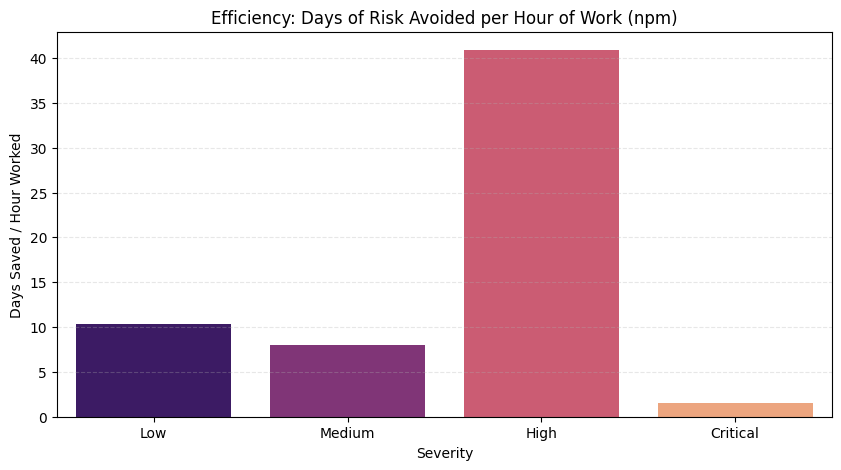

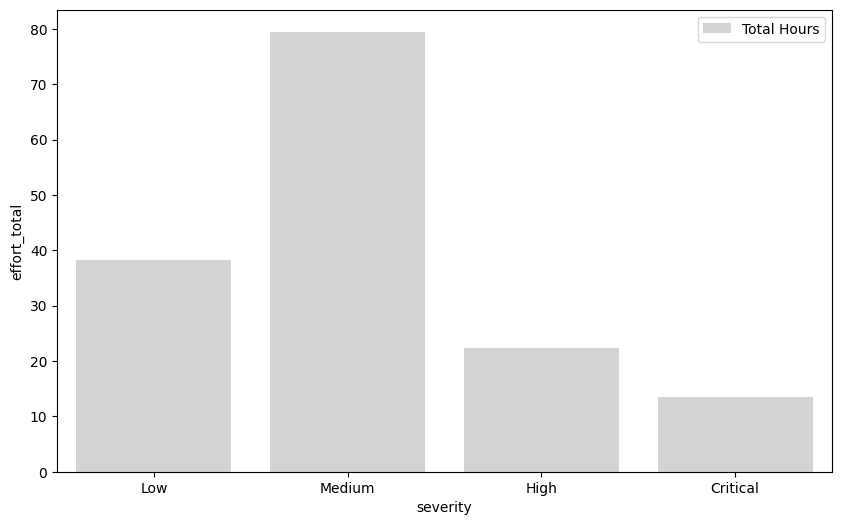

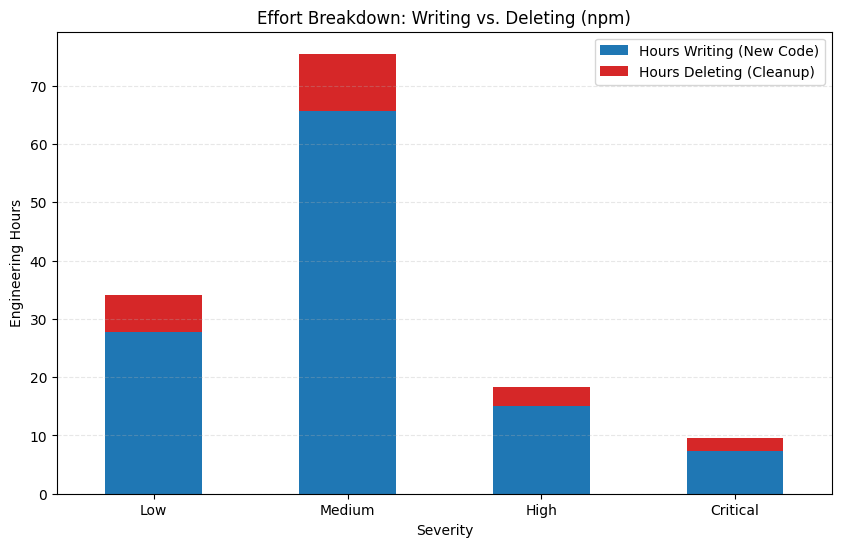

In [8]:
# We resetten de index even tijdelijk voor de plot, zodat 'severity' weer een kolom is
plot_data = df.reset_index()

# --- GRAFIEK 1: EFFICIENCY (Jouw originele plot, gerepareerd) ---
plt.figure(figsize=(10, 5))

sns.barplot(
    x='severity', 
    y='efficiency_ratio', 
    data=plot_data, 
    order=order, 
    palette='magma'
)

plt.title(f"Efficiency: Days of Risk Avoided per Hour of Work ({CURRENT_ECOSYSTEM})")
plt.ylabel("Days Saved / Hour Worked")
plt.xlabel("Severity")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# --- GRAFIEK 2: EFFORT BREAKDOWN (NIEUW & HEEL WAARDEVOL!) ---
# Deze grafiek laat zien: Waar zit het werk? In schrijven of deleten?
# We gebruiken een 'Stacked Bar Chart'

# We pakken alleen de kolommen die we willen stapelen
effort_breakdown = df[['hours_writing', 'hours_deleting', 'effort_total']]

plt.figure(figsize=(10, 6))

# Stap 1: De totale balk (achtergrond)
sns.barplot(x=effort_breakdown.index, y='effort_total', data=effort_breakdown, order=order, color='lightgray', label='Total Hours')

# Stap 2: De 'Writing' uren (onderop)
# We plotten ze 'stacked' door een listige truc met seaborn of gewoon pandas plot
# Pandas plot is hier makkelijker voor stapelen:
ax = df[['hours_writing', 'hours_deleting']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#d62728'])

plt.title(f"Effort Breakdown: Writing vs. Deleting ({CURRENT_ECOSYSTEM})")
plt.ylabel("Engineering Hours")
plt.xlabel("Severity")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(["Hours Writing (New Code)", "Hours Deleting (Cleanup)"])
plt.xticks(rotation=0) # Zorgt dat de tekst recht staat

plt.show()